In [2]:
import matplotlib
import json 
import numpy as np 
import pandas as pd 
from collections import defaultdict

In [3]:
fp = "/Users/jcho/projects/isi_darma/surge_analysis/[Surge AI] USC ISI - German - Both Models.json"

with open(fp, "r") as f: 
    data = json.load(f)

In [4]:
survey_questions = {
    "How Coherent was the conversation?": "coherency",
    "How likely are you to continue chatting with the moderator?": "engaging",
    "To what degree did the moderator understand your point of view?": "understanding",
    "To what degree did the moderator convince you to change your behavior?": "convincing"
}

score_mapping = {
    'Not at all': 0, 
    'Mostly not': 1, 
    'So-so': 2, 
    'Somewhat': 3, 
    'Very': 4
}

In [5]:
len(data)

150

In [6]:
# optional: work with dataframes 
df = pd.DataFrame.from_dict(data)
len(df[df["Model"]=="Wisebeing"]), len(df[df["Model"]=="Moderator"])

In [24]:
# organize results
model_results = defaultdict(dict)
for conv in data: 
    for q, prop in survey_questions.items(): 
        model = conv['Model']
        if prop not in model_results[model]: 
            model_results[model][prop] = [] 
        model_results[model][prop].append(conv[q])

In [27]:
# get counts per model per category 
from collections import Counter
from pprint import pprint
count_results = {model: defaultdict(dict) for model in model_results.keys()}
for model, prop_results in model_results.items(): 
    for prop in prop_results: 
        count_results[model][prop]=Counter(prop_results[prop])

# pprint(count_results)


In [30]:
# get counts per model per category 
mean_results = {model: defaultdict(dict) for model in model_results.keys()}
for model, prop_results in model_results.items(): 
    for prop in prop_results: 
        mean_results[model][prop] = np.mean([score_mapping[rating] for rating in prop_results[prop]])
        
# pprint(mean_results)

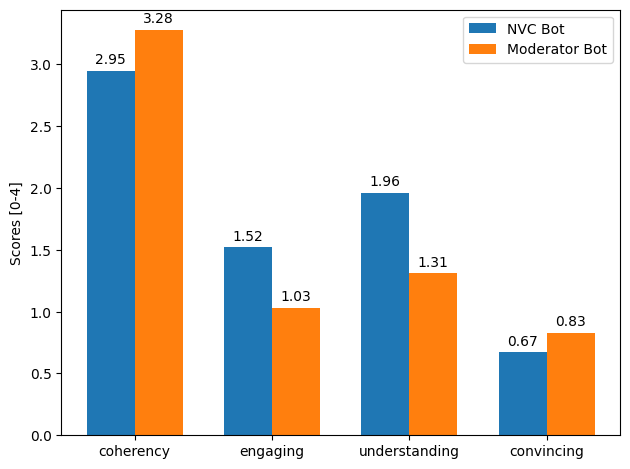

In [23]:
import matplotlib.pyplot as plt
import numpy as np


labels = list(survey_questions.values()) 
wisebeing_mean = [round(mean_results["Wisebeing"][prop], 2) for prop in labels]
moderator_mean = [round(mean_results["Moderator"][prop],2) for prop in labels]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, wisebeing_mean, width, label='NVC Bot')
rects2 = ax.bar(x + width/2, moderator_mean, width, label='Moderator Bot')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores [0-4]')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()